<a href="https://colab.research.google.com/github/Celes-ovo/Keras/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.5 : 다중 분류 문제

3.4의 예제 : 이진 분류 문제(binary classification). 2개의 클래스가 있을 경우.   
이번 장의 예제 : 2개 이상의 클래스가 있을 경우.

###단일 레이블 다중 분류, 다중 레이블 다중 분류   
> 딘일 레이블 다중 분류 : 각 데이터 포인트들이 정확히 하나의 범주로 분류된다.   
다중 레이블 다중 분류 : 각 데이터 포인트들이 여러 개의 범주로 분류될 수 있다.

`<로이터 데이터셋>`

In [ ]:
from keras.datasets import reuters
#로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용함.   46개의 토픽, 각 토픽 당 최소한 10개의 샘플



(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
#데이터에서 가장 자주 등장하는 단어 1만 개로 제한.

"""
>>> len(train_data)
8982
>>>len(test_data)
2246
"""
#8982개의 훈련 샘플과 2246개의 테스트 샘플이 있음. + 각 샘플은 정수 리스트.

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


'\n>>> len(train_data)\n8982\n>>>len(test_data)\n2246\n'

In [ ]:
train_labels.

(8982,)

In [ ]:
train_data.shape

(8982,)

`<데이터 인코딩>`

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성.
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # ???  results[i]에서 특정 인덱스의 위치를 1로 만든다는데...
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46): # 원 핫 인코딩
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1. # ??
  return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

☆ 레이블을 벡터로 바꾸는 방법
* 레이블의 리스트를 정수 텐서로 변환하는 것
* 원-핫 인코딩을 사용하는 것.   
원 핫 인코딩의 경우, 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고 불림.

☆ 원-핫 인코딩(One-Hot Encoding)   

>단어 집합의 크기를 벡터의 차원으로 하고,   
**표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여**하는 단어의 벡터 표현 방식   

>이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 한다.
######출처 : https://wikidocs.net/22647   

이 경우에는 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터이다.

In [ ]:
"""
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

'\nfrom keras.utils.np_utils import to_categorical\n\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n'

케라스에는 이를 위한 내장 함수가 있어서 이렇게도 표현 가능하다.

`<모댈 구성>`

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,))) # 10000, 의 뜻?
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

 >앞 절의 내용과 달리, 마지막 레이어 dense 층의 크기가 1이 아닌 46이다.
 즉 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻.

`mnist 예제와 비교했을 때 ??? model.add와 network.add의 차이는??`

#3.4   
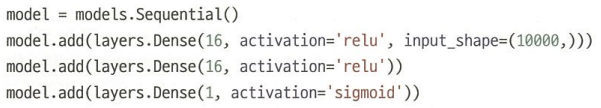

`위 예제에서는 16차원의 공간을 사용하고 있지만,   
아래의 예제에서 16차원으로 64개를 뽑아내기엔 힘들다. (병목 현상)`

`따라서 16차원이 아닌 64차원으로 늘린다.`

#3.5   
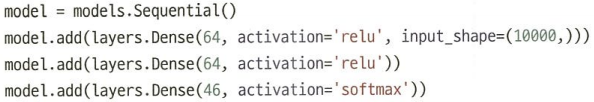

마지막 부분을 보면, 각 입력 샘플에 대해서 46차원의 벡터를 출력함.   
또한 3.4와 다르게, sigmoid가 아닌 softmax가 사용되었다.

+ Softmax(소프트맥스) : 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며   
출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.

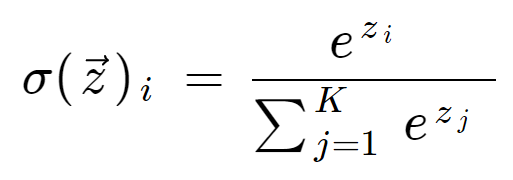

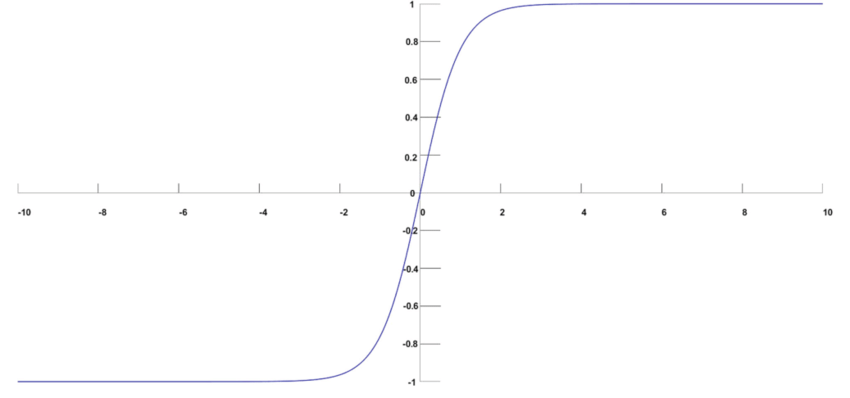

`<손실 함수 사용하기 - categorical_crossentropy>`

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc']) # 모델 컴파일하기

In [ ]:
# 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증 세트로 사용

x_val = x_train[:1000]
partial_x_train = x_train[1000:]  # ?? 1000:, :1000

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
# 20번의 epoch로 모델을 훈련

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1120 - accuracy: 0.9587 - val_loss: 1.0514 - val_accuracy: 0.8070
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 0.1071 - accuracy: 0.9587 - val_loss: 1.0776 - val_accuracy: 0.8060
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1041 - accuracy: 0.9584 - val_loss: 1.2096 - val_accuracy: 0.7900
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1026 - accuracy: 0.9593 - val_loss: 1.2199 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.1043 - accuracy: 0.9569 - val_loss: 1.1260 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.1006 - accuracy: 0.9592 - val_loss: 1.3198 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1021 - accuracy: 0.9583 - val_loss: 1.1539 - val_accuracy: 0.8020
Epoch 8/20
16

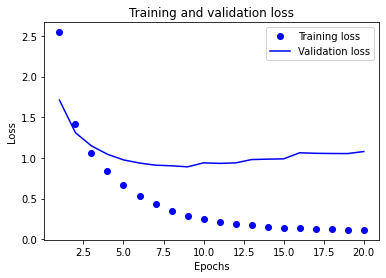

In [ ]:
#훈련과 검증 손실 곡선 그리기

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # 파란색 선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #??

plt.show()

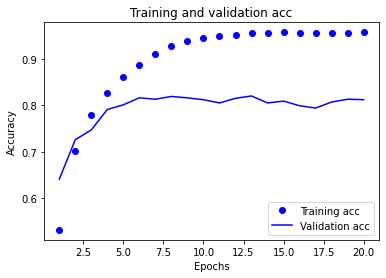

In [ ]:
#훈련과 검증 정확도 곡선 그리기

plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc') # 파란색 점
plt.plot(epochs, val_acc, 'b', label = 'Validation acc') # 파란색 선
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() #??

plt.show()

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 3.0295 - acc: 0.4312 - val_loss: 1.7107 - val_acc: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4849 - acc: 0.6925 - val_loss: 1.3091 - val_acc: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0911 - acc: 0.7713 - val_loss: 1.1470 - val_acc: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8484 - acc: 0.8232 - val_loss: 1.0441 - val_acc: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6888 - acc: 0.8612 - val_loss: 0.9747 - val_acc: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5250 - acc: 0.8900 - val_loss: 0.9363 - val_acc: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4328 - acc: 0.9099 - val_loss: 0.9098 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 1s 55ms/step - loss: 0.3548 - a

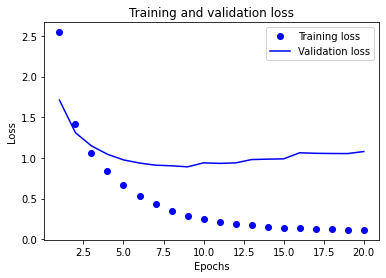

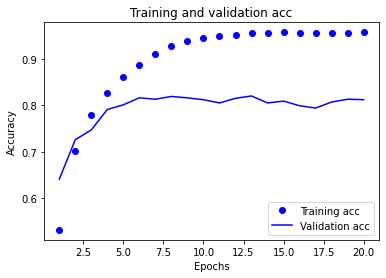

In [ ]:
# 전체 코드

from keras.datasets import reuters
#로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터샛을 사용함.   46개의 토픽, 각 토픽 당 최소한 10개의 샘플

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
#데이터에서 가장 자주 등장하는 단어 1만 개로 제한.

"""
>>> len(train_data)
8982
>>>len(test_data)
2246
"""
#8982개의 훈련 샘플과 2246개의 테스트 샘플이 있음. + 각 샘플은 정수 리스트.

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성.
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # ???  results[i]에서 특정 인덱스의 위치를 1로 만든다는데...
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46): # 원 핫 인코딩
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1. # ??
  return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

"""
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,))) # 10000, 의 뜻?
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc']) # 모델 컴파일하기

# 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증 세트로 사용

x_val = x_train[:1000]
partial_x_train = x_train[1000:]  # ?? 1000:, :1000

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 20번의 epoch로 모델을 훈련

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

#손실과 정확도 곡선 그리기

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # 파란색 선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #??

plt.show()

#훈련과 검증 정확도 곡선 그리기

plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc') # 파란색 점
plt.plot(epochs, val_acc, 'b', label = 'Validation acc') # 파란색 선
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() #??

plt.show()

#3.6 predict 메서드

모델 인스턴스의 predict 메서드 : 46개의 토픽에 대힌 확률 분포를 반환.

In [ ]:
predictions = model.predict(x_test)

predictions[0].shape

(46,)

`predictions의 각 항목은 길이가 46인 벡터이다.`

In [ ]:
np.sum(predictions[0])

1.0

`이 벡터의 원소 합은 1이다.`

In [ ]:
np.argmax(predictions[0])

3

가장 큰 값이 예측 클래스가 된다.   
-> 가장 확률이 높은 클래스이다.

#3.7 레이블과 손실을 다루는 방법

☆ 레이블을 벡터로 바꾸는 방법
* 레이블의 리스트를 정수 텐서로 변환하는 것
* 원-핫 인코딩을 사용하는 것.   

여기서 정수 탠서를 다시 보면

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

categorical_crossentropy : 레이블이 범주형 인코딩되어 있을 것이라고 기대.

범주형 데이터의 처리 종류
* Label encoding
* one_hot encoding

정수 레이블을 사용할 경우, sparse_categorical_crossentropy를 사용.

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

#수학적으로 categorical_crossentropy와 동일

#3.8 충분히 큰 중간층을 두어야 하는 이유

마지막 출력보다 중간층의 히든 유닛이 적으면 안 된다.   
> 앞 예제에서 46차원의 출력을 위해 앞의 두 레이어를 64차원으로 늘렸다.   
그렇다면 만약 작다면 어떻게 될까?

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,))) # 10000, 의 뜻?
model.add(layers.Dense(4, activation = 'relu'))  # 두 번째 레이어를 4차원만 주었다.
model.add(layers.Dense(46, activation = 'softmax'))

`검증 결과는 약 71퍼센트로 8% 정도 감소된다고 한다.`   
`많은 정보를 중간층의 4차원 공간으로 압축하려 했기 때문.`

#3.9 추가 실험

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 3.4127 - acc: 0.3454 - val_loss: 2.3341 - val_acc: 0.5860
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 2.0822 - acc: 0.6359 - val_loss: 1.6782 - val_acc: 0.6450
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.4710 - acc: 0.7013 - val_loss: 1.3739 - val_acc: 0.6890
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 1.1462 - acc: 0.7466 - val_loss: 1.2222 - val_acc: 0.7360
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9699 - acc: 0.7862 - val_loss: 1.1265 - val_acc: 0.7470
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.8096 - acc: 0.8208 - val_loss: 1.0651 - val_acc: 0.7640
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.7069 - acc: 0.8428 - val_loss: 1.0156 - val_acc: 0.7760
Epoch 8/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6095 - a

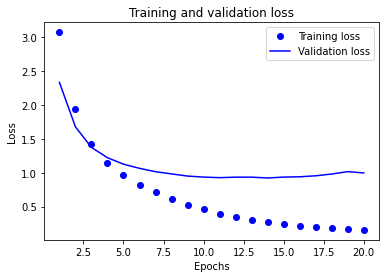

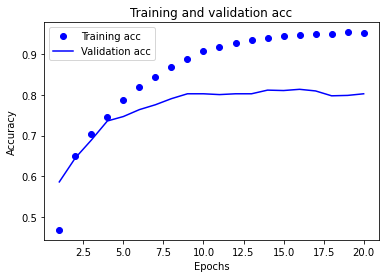

In [ ]:
#32개의 유닛을 사용할 경우

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 2.8419 - acc: 0.4321 - val_loss: 1.4341 - val_acc: 0.6760
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.2227 - acc: 0.7364 - val_loss: 1.1381 - val_acc: 0.7640
Epoch 3/20
16/16 [==============================] - 1s 75ms/step - loss: 0.8482 - acc: 0.8187 - val_loss: 1.0278 - val_acc: 0.7960
Epoch 4/20
16/16 [==============================] - 1s 65ms/step - loss: 0.6021 - acc: 0.8781 - val_loss: 0.9881 - val_acc: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 65ms/step - loss: 0.4376 - acc: 0.9131 - val_loss: 0.8986 - val_acc: 0.8110
Epoch 6/20
16/16 [==============================] - 1s 66ms/step - loss: 0.3233 - acc: 0.9338 - val_loss: 0.9202 - val_acc: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 66ms/step - loss: 0.2500 - acc: 0.9447 - val_loss: 0.9997 - val_acc: 0.7780
Epoch 8/20
16/16 [==============================] - 1s 65ms/step - loss: 0.1930 - a

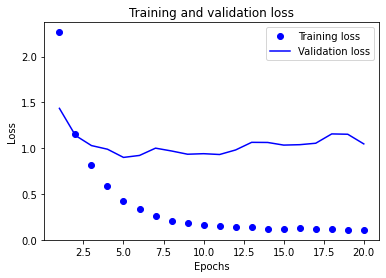

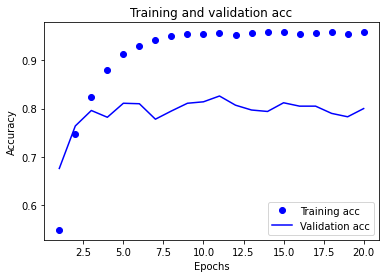

In [ ]:
#128개의 유닛을 사용할 경우

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

`46차원`

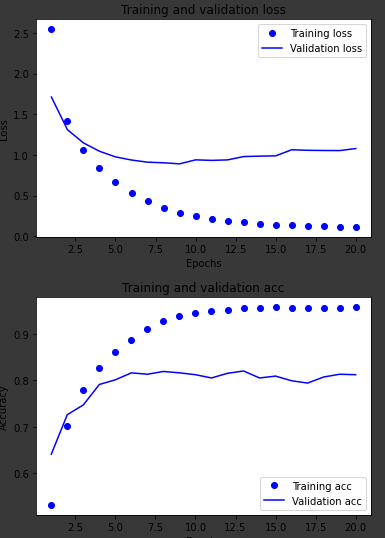

`32차원`

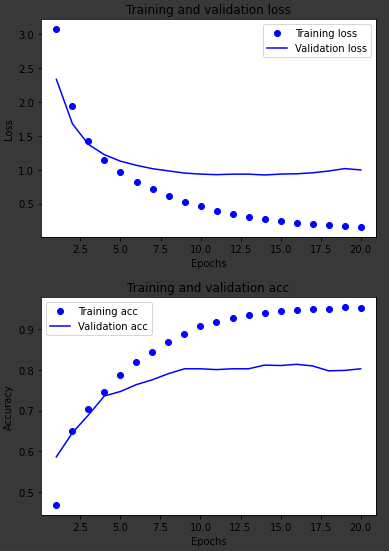

`128차원`

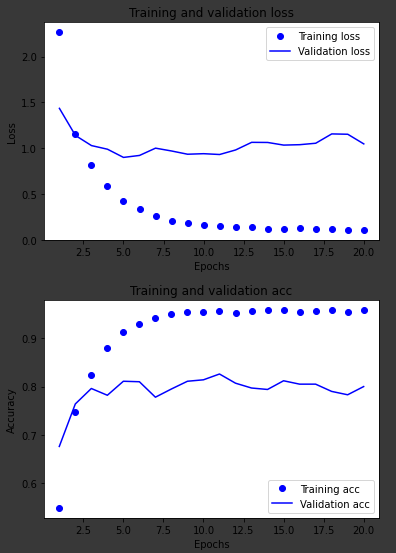

#3.10 추가 실험-2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 3.0635 - acc: 0.4490 - val_loss: 1.8635 - val_acc: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.6234 - acc: 0.7119 - val_loss: 1.3900 - val_acc: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.1395 - acc: 0.7760 - val_loss: 1.1583 - val_acc: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8697 - acc: 0.8319 - val_loss: 1.0313 - val_acc: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6945 - acc: 0.8688 - val_loss: 0.9475 - val_acc: 0.8110
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.5656 - acc: 0.8952 - val_loss: 0.8954 - val_acc: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4601 - acc: 0.9118 - val_loss: 0.8679 - val_acc: 0.8280
Epoch 8/20
16/16 [==============================] - 1s 40ms/step - loss: 0.3725 - a

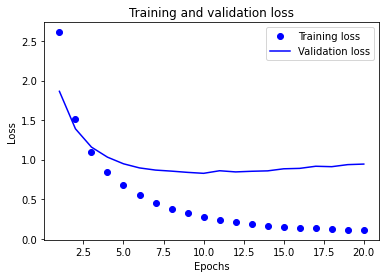

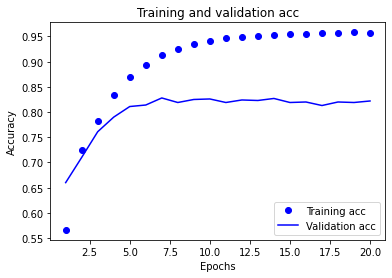

In [ ]:
#1개의 은닉 층

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
#model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 3.2161 - acc: 0.3885 - val_loss: 1.7642 - val_acc: 0.5820
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.5640 - acc: 0.6356 - val_loss: 1.3608 - val_acc: 0.6880
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1439 - acc: 0.7423 - val_loss: 1.2257 - val_acc: 0.7160
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8541 - acc: 0.8146 - val_loss: 1.1116 - val_acc: 0.7450
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6944 - acc: 0.8482 - val_loss: 1.0412 - val_acc: 0.7670
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5528 - acc: 0.8808 - val_loss: 0.9926 - val_acc: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4413 - acc: 0.9067 - val_loss: 1.0478 - val_acc: 0.7820
Epoch 8/20
16/16 [==============================] - 1s 41ms/step - loss: 0.3321 - a

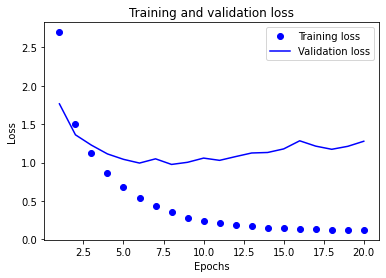

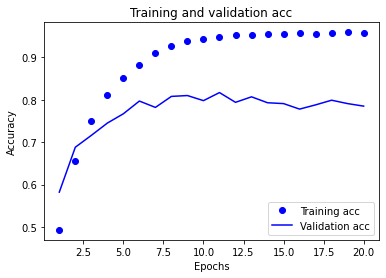

In [ ]:
#3개의 은닉 층

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

`1개의 은닉 층`

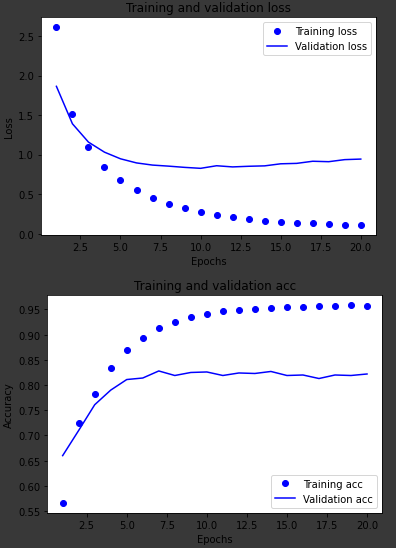

`2개의 은닉 층(원래)`

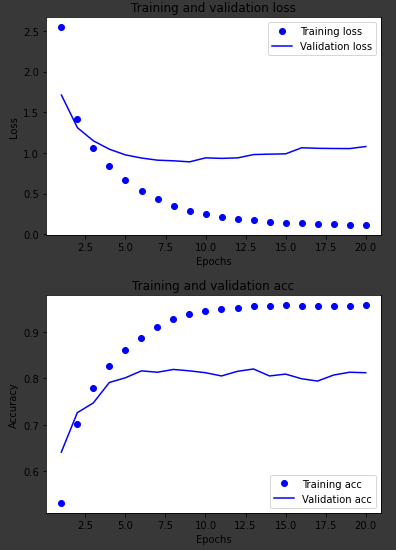

`3개의 은닉 층`

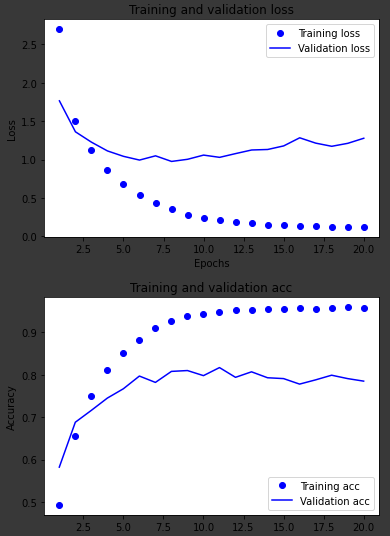